# Solución numérica de ecuaciones diferenciales ordinarias 
## (Método de Euler)
<hr/>
##### El problema de valor inicial:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = f(x,y) \\
		 y(x_0) = y_0
	       \end{array}
	     \right.
\end{equation}

##### Se resuelve de manera aproximada usando el método de Euler. Para ello,  consideramos la solucion dentro de un intervalo $[x_0,x_f]$, tomamos $n$ divisiones uniformes del intervalo, de manera que tenemos la sucesion $[x_0, x_1, x_2, \dots, x_n]$ y calculamos la solucion $y(x)$ sobre cada punto de la sucesión siguiendo el esquema:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{n+1} = x_n +\Delta x \\
		 y_{n+1} = y_n + \Delta x \cdot f(x_n,y_n)
	       \end{array}
	     \right.
\end{equation}

##### aquí $\Delta x = (x_f - x_0)/n$.

In [5]:
# funcion que implementa el método de euler
# -> (x0,y0): condicion inicial
# -> f      : f(x,y)
# -> nd  : número de divisiones
import numpy as np
import math as m
import matplotlib.pyplot as plt

def euler(f,x0,y0,xf,nd):
    x    = np.zeros(nd)
    y    = np.zeros(nd)
    dx   = (xf-x0)/nd
    x[0] = x0
    y[0] = y0
    for i in range(nd-1):
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dx*f(x[i],y[i])
    return x, y

<hr/>
#### Consideremos como ejemplo sencillo el siguiente problema de valor inicial:
\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = y \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}

##### la solución exacta a este problema es $y(x)=e^x$, ahora obtengamos soluciones aproximadas usando el método de euler.


In [11]:
import math as ma
def f1(x,y):
    return y
def ex_sol(x):
    return ma.exp(x)

xx, yy = euler(f1,0,1,2,10)

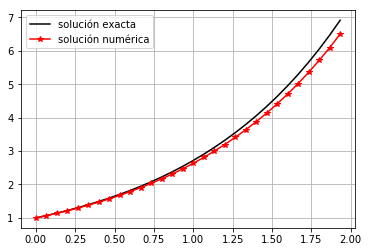

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
vec_sol = np.vectorize(ex_sol)
plt.plot(xx,vec_sol(xx),'k',label = 'solución exacta')
plt.plot(xx,yy,'r-*',label = 'solución numérica')
plt.legend()
plt.grid(True)

<hr/>
#### Observemos ahora que la solución numérica se aproxima a la solución exacta a medida de $\Delta x$ es cada vez más pequeño:

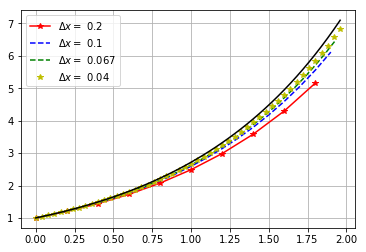

In [33]:
divisions = [10,20,30,50]
types = ['r-*','b--','g--','y*']
for i, d in enumerate(divisions):
    xx, yy = euler(f1,0,1,2,d)
    plt.plot(xx,yy,types[i],label=r'$\Delta x = $ '+str(round(2/d,3)))
plt.plot(xx,vec_sol(xx),'k')
plt.legend()
plt.grid(True)

<hr/>
#### Ejemplo con la ecuación logística:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = y(1-y) \\
		 y(0) = 2
	       \end{array}
	     \right.
\end{equation}

cuya solución exacta está dada por:

\begin{equation}
    y(x) = 1 -\frac{1}{1+2 e^x}
\end{equation}

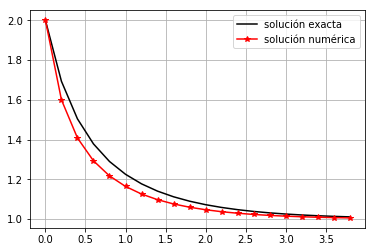

In [37]:
def f2(x,y):
    return y*(1-y)
def ex_sol(x):
    return 1 - 1/(1-2*ma.exp(x)) 

xx, yy = euler(f2,0,2,4,20)

vec_sol = np.vectorize(ex_sol)
plt.plot(xx,vec_sol(xx),'k',label = 'solución exacta')
plt.plot(xx,yy,'r-*',label = 'solución numérica')
plt.legend()
plt.grid(True)

#### Ejemplo con una ecuación no-autonónoma:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = y \cos(x) \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}



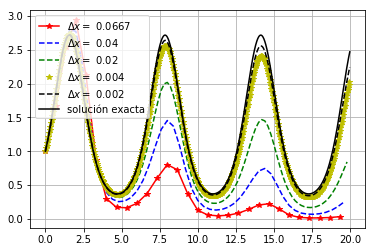

In [57]:
def f3(x,y):
    return y*ma.cos(x)
def ex_sol(x):
    return ma.exp(ma.sin(x))
vec_sol = np.vectorize(ex_sol)

divisions = [30,50,100,500,1000]
types = ['r-*','b--','g--','y*','k--']
for i, d in enumerate(divisions):
    xx, yy = euler(f3,0,1,20,d)
    plt.plot(xx,yy,types[i],label=r'$\Delta x = $ '+str(round(2/d,4)))
plt.plot(xx,vec_sol(xx),'k',label = 'solución exacta')
plt.legend()
plt.grid(True)

<hr/>
## Ejercicio en clase:

##### Se sabe que la solución exacta al problema de valor incial:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = \sin(y) \\
		 y(a) = y_a
	       \end{array}
	     \right.
\end{equation}

##### está dada por: 

\begin{equation}
y(t) = 2 \arctan(e^{t-a}\tan(y_a/2)) + 2 \pi [(y_a + \pi)/2 \pi ]
\end{equation}

##### donde el símbolo $[\dots]$ denota la función [parte entera](https://es.wikipedia.org/wiki/Funciones_de_parte_entera). Calcule la solución aproximada por Euler del anterior problema de valor inicial:

##### a) tomando $a = 0$ e $y_a = 0$
##### b) tomando $a = 0$ e $y_a = 100$

##### En cada caso utilice valores de $\Delta x$ de la forma $0.1 \times 2^{-k}$ donde $k = 0,1,2,3,4,5$. Realice un gráfico donde compare todas las soluciones numéricas de una misma condicion inicial (para cada condición inicial).